<h3><b>Introduction to Data Analytics - Exercise set 4, advanced exercise 1</b></h3>

<h4><b>Employee satisfaction dataset</b></h4>
<h3 style="color: red;">NOTE! This notebook requires that your Python environment has <i>openpyxl</i>-module installed (excel-file support).</h3>
<h4>To install: <b style="color: red;">pip3 install openpyxl</b></h4>
<h3>After this, restart your Jupyter kernel (Restart -button in top of notebook).</h3>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/office.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data, or data is just self-explanatory). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains employee data of an unknown company, containing multiple variables. These include the level of satisfaction in their job (0-100%), how many years since last evaluation, number of projects the employee is currently working on, average works hours in last 3 months, time spend while traveling to work, whether employee has been in a work accident, if the employee has left the company, whether the employee has had a promotion in last 5 years and the department they work in.</p>

<p>Original data: <a href="https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics">https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>Which columns affect most the satisfaction of the employee in the company? What are the most obvious factors?</li>
<li>What features happy employees typically have? How about unhappy employees?</li>
<li>Are there any notable differences between salary levels or Department?</li>
<li>According to correlation matrix, there's only one column that correlates with satisfaction somewhat. How much information about the connections in the data is lost if we only inspect the correlation matrix?</li>

<b>Optional questions/tasks for extra points:</b>
<li>Based on this dataset, what would be the easiest way to make employees happier?</li>
<li>Any other interesting correlations or phenomena in this dataset?</li>
<li>Do the correlations and/or other connections change considerably, if salary levels and/or departments are inspected separately? (this is an extra difficult task: the idea is to filter a new dataframe with a single salary level or a department, and try out different plots)</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<b>
So we can check satisfaction of the employee in different columns. First we see <br>
regression plot, satisfaction vs amount of time spent while traveling to work, hue <br>
salary: small correlation can be seen, people prefer to have work place closer to <br>
their homes, that's for sure, but overall it does not affect much. (salary does not <br>
affect much as well, though it is clear that people with higher salaries spend less time) <br>
Regression plot, satisfaction vs if employee has left the company shows that people <br>
leave companies if they are not satisfied, niether salary nor department affect this <br>
much (clear 40% correlation) though again, looks like people with higher salaries or <br>
people who are from managment are more likely to stay and be satisfied (as rahter you <br>
do not have a sit and code job which might be irratating from time to time, or you are <br>
a well paid senior who is happy with everything.) Finally we can see regression plot, <br>
satisfaction vs number of project employee is working on currently, hue on department <br>
and here we can see that mostly every department's satisfaction level goes down when they <br>
have more and more projects except people from marketing and people from hr. (Maybe <br>
because people from those departments usually have many projects at once or they get <br>
some benifits if they do many projects)
</b>

<b>So as I checked well satisfied workers work in management, product_mng (as those are not <br>
the hardest jobs I suppose) or IT (as it is very well paid). Usually people have 3-5 <br>
projects and of course if they are paid higher, they are more satisfied. <br>
<br>
Unsatisfied workers usually work in hr, accounting or support. (Well every one knows <br>
that accounting is a bit boring, support might be annoying and hr well I am not sure, <br>
but not much promotions and not very well paid either). Those people usually have more <br>
than 5 projects and obviosly not very high salaries.</b>

<b>Surprisingly to me, but managment on average has the highest salaries (much higher than <br>
the rest actually), and IT, technical and support are on the bottom of the list.</b>

<h2>Advanced</h2>

<b>As I said before, 'left' and 'level' actually anticorrelate well (dont like it -> leave). <br>
Lots of information could not be provided by the matrix, such as everything related to <br>
salary and departments, and overall understanding of satisfaction level in different places. </b>

<b>I suppose the easiest way to make employees happier would be to increase their salary, <br>
decrease a bit amount of projects, and promote people at least once in 5 years.</b>

<b>I think I mentioned all interesting facts I found in this df before, not much to add here. <br>
Would be interesting to add some food dataset, (like what do they eat in cafe in office), <br>
as I heard it also affect the happiness level.</b>

<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Helper functions for data clean-up</b></h4>

In [2]:
# helper function to have a solid category for certain ranges
# this makes it helper to use regression and box plots with hue
def create_last_evaluation_category(row):
    evaluation = row['last_evaluation']

    if evaluation < 0.5:
        return "Recently"
    elif 0.5 <= evaluation <= 0.75:
        return "Some time ago"
    elif evaluation > 0.75:
        return "Long time ago"

<h4><b>Data processing</b></h4>

In [3]:
# load dataset and drop the employee id -column (can't be used in any analytics)
# and yes, pandas can also read excel-files, but they usually have extra empty lines etc.
# that need more cleaning up before attempting to process the data with pandas.
# this dataset, however, seems to be very clean, regardless being an excel-file
df = pd.read_excel('HR_Employee_Data.xlsx')
df = df.drop("Emp_Id", axis=1)

# get correlations
correlations = df.corr(numeric_only=True)

# this dataset is a bit too big to use certain plots, like pair plot
# taking a smaller sample might be a good idea

# set a random seed (so you get every time the same sample)
# and get a sample of 3000 employees in order to more easily create readable plots
np.random.seed(313)
df_sample = df.sample(3000)

<h4><b>seaborn plots - pair plots</b></h4>

In [62]:
df_sample.head()

satisfaction_level  last_evaluation  number_project  \
9506                 0.50             0.63               5   
3602                 0.87             0.91               5   
5643                 0.56             0.69               5   
13439                0.71             0.64               3   
9453                 0.56             0.66               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
9506                    167                   2              0     0   
3602                    190                   2              0     0   
5643                    239                   2              1     0   
13439                   267                   3              0     0   
9453                    139                   2              0     0   

       promotion_last_5years   Department salary last_evaluation_category  \
9506                       0    technical    low            Some time ago   
3602                       0        sales    low            Long time ago   
5643                       0           IT    low            Some time ago   
13439                      0    technical    low            Some time ago   
9453                       0  product_mng    low            Some time ago   

       avg_hour_category  travel_category  
9506                   3                1  
3602                   3                1  
5643                   3                1  
13439                  3                1  
9453                   3                1

In [78]:
mean_satisfaction_by_department = df_sample.groupby('Department')['satisfaction_level'].mean()
top_three = mean_satisfaction_by_department.sort_values(ascending=False).head(3)
top_three

Department
management     0.635854
product_mng    0.620698
IT             0.614619
Name: satisfaction_level, dtype: float64

In [83]:
mean_satisfaction_by_number_project = df_sample.groupby('number_project')['satisfaction_level'].mean()
top_three = mean_satisfaction_by_number_project.sort_values().head(3)
top_three

number_project
7    0.105581
6    0.295292
2    0.466793
Name: satisfaction_level, dtype: float64

In [70]:
mean_satisfaction_by_salary = df_sample.groupby('salary')['satisfaction_level'].mean()
top_three = mean_satisfaction_by_salary.sort_values(ascending=False).head(3)
top_three

salary
high      0.639630
medium    0.613644
low       0.600647
Name: satisfaction_level, dtype: float64

In [76]:
#df_sample['salary'] = df_sample['salary'].replace({'low': 1, 'medium': 2, 'high': 3})

#mean_satisfaction_by_department = df_sample.groupby('Department')['salary'].mean()
#top_three = mean_satisfaction_by_department.sort_values()
#top_three

Department
product_mng    1.544186
support        1.545024
technical      1.557009
IT             1.573991
sales          1.580189
accounting     1.585526
hr             1.634921
RandD          1.660714
marketing      1.680851
management     2.081301
Name: salary, dtype: float64

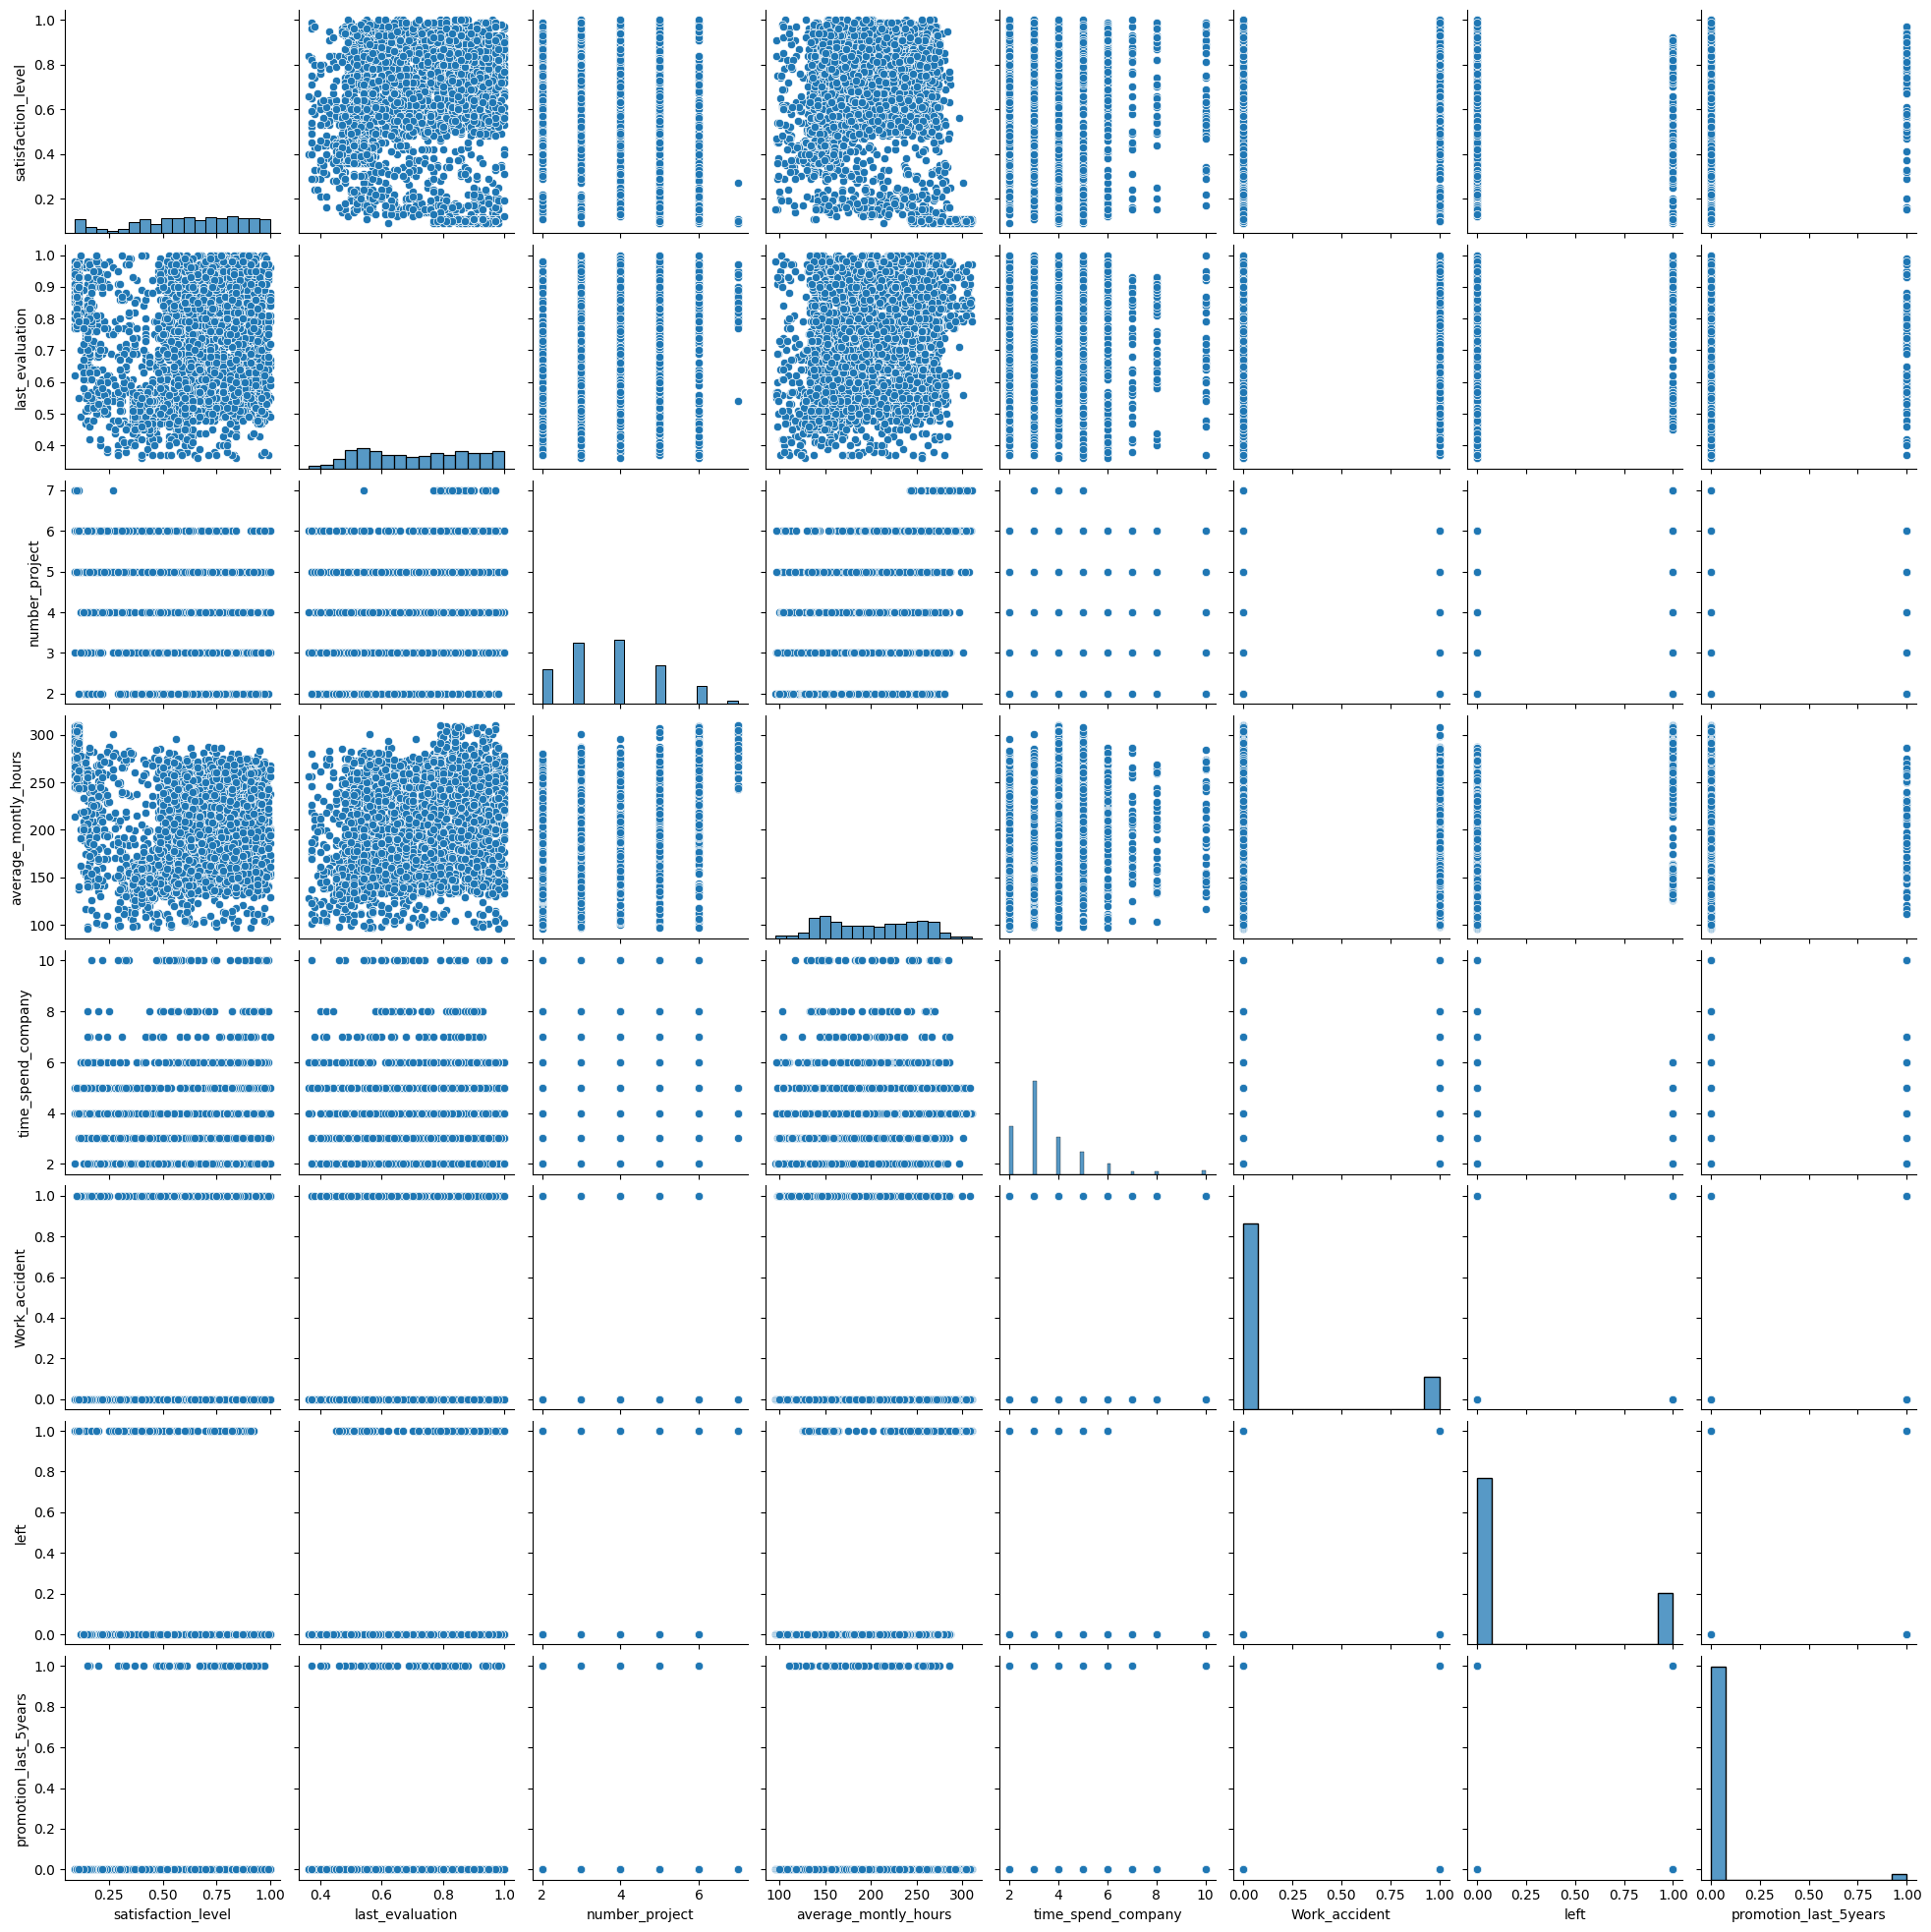

In [4]:
# basic pair plot
sns.pairplot(df_sample)

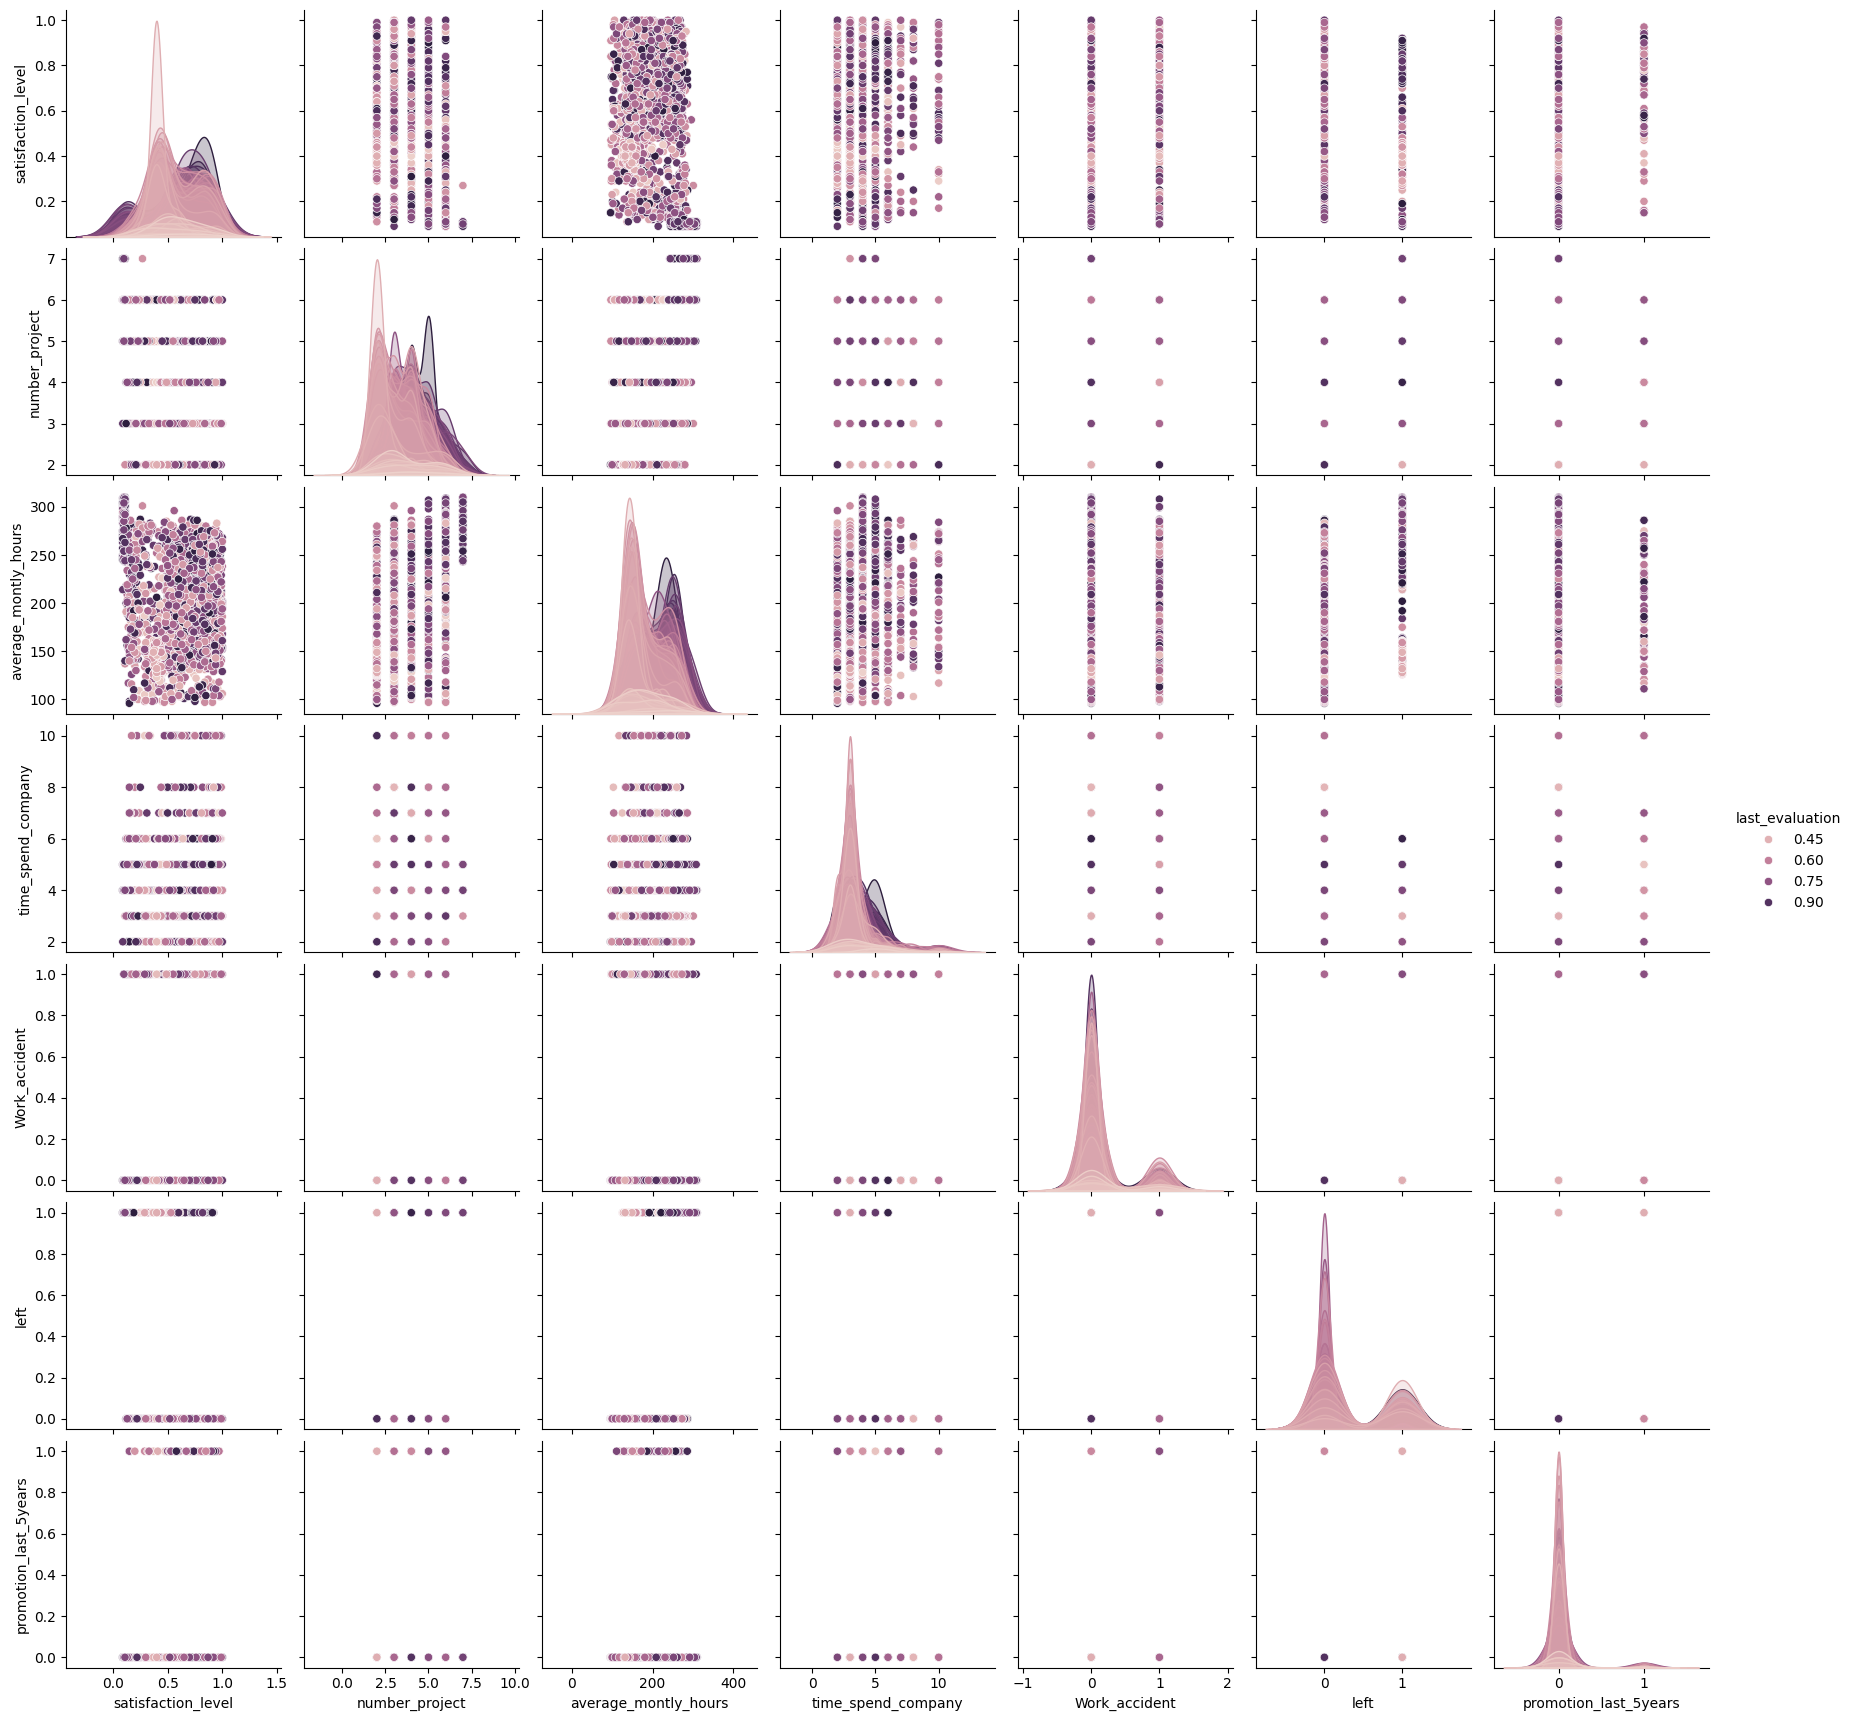

In [5]:
# basic pair plot, hue on last evaluation (continuous variable between 0 and 1)
sns.pairplot(df_sample, hue="last_evaluation")

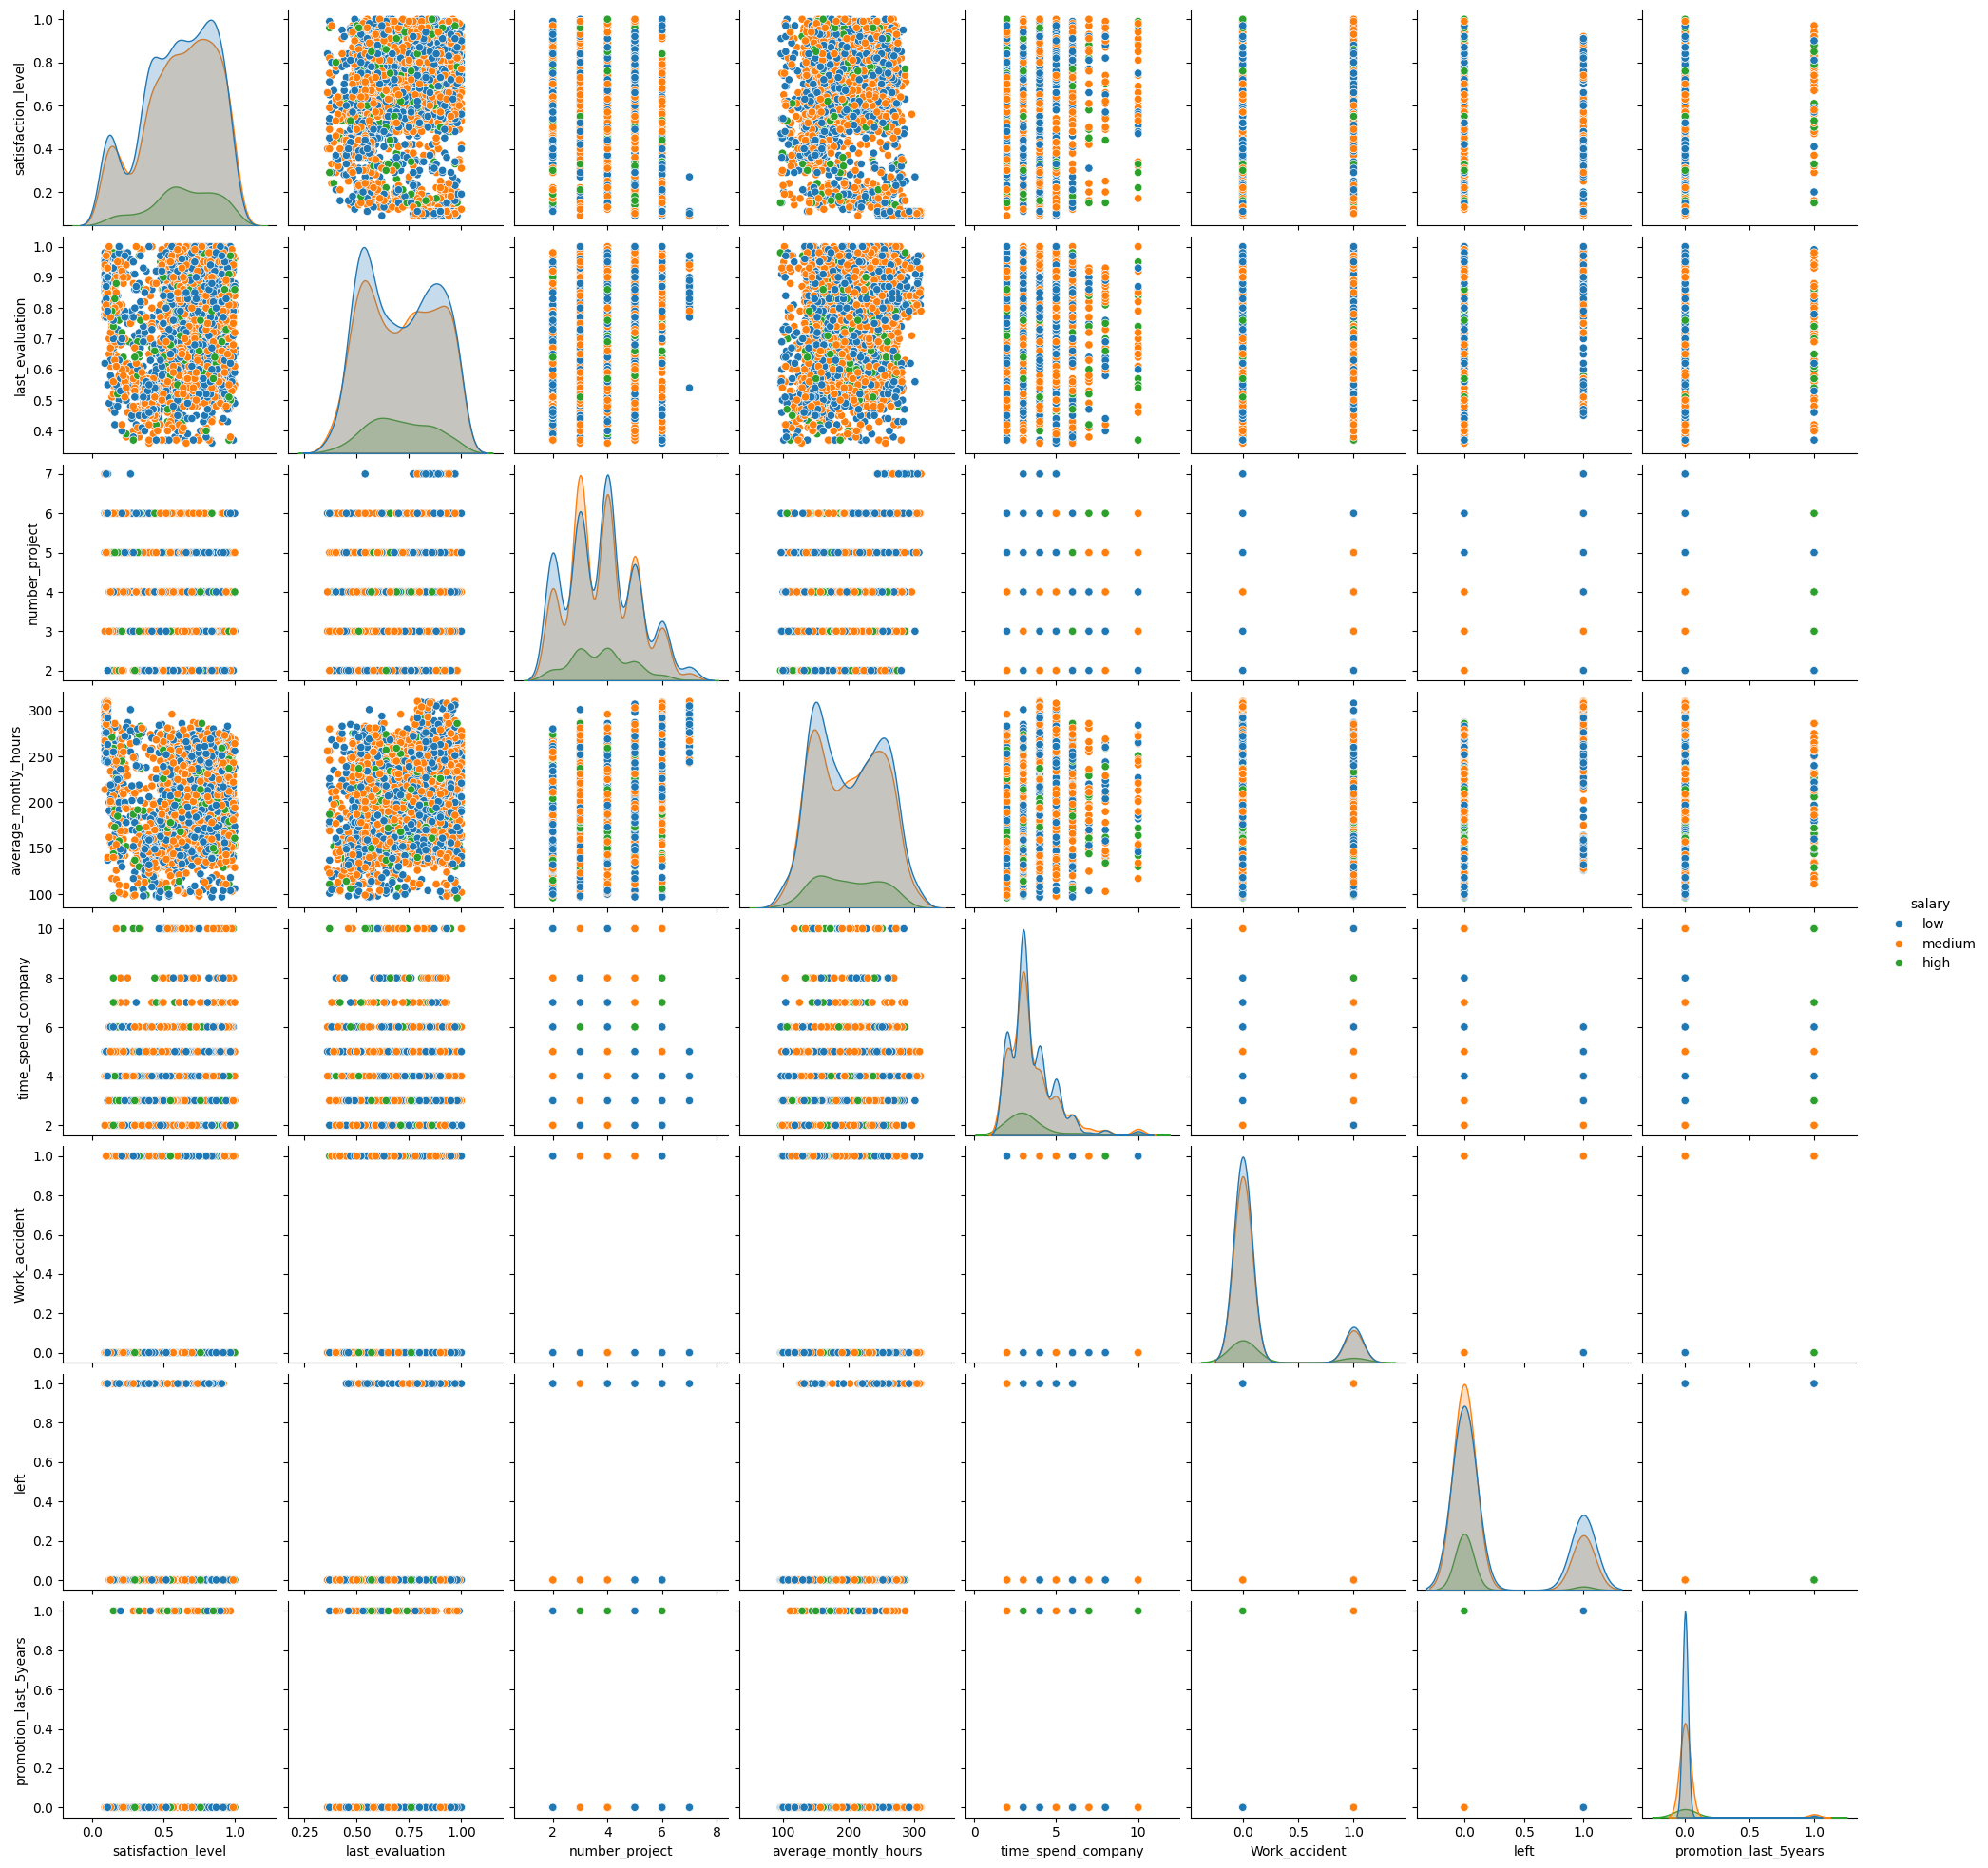

In [6]:
# basic pair plot, hue on salary
sns.pairplot(df_sample, hue="salary")

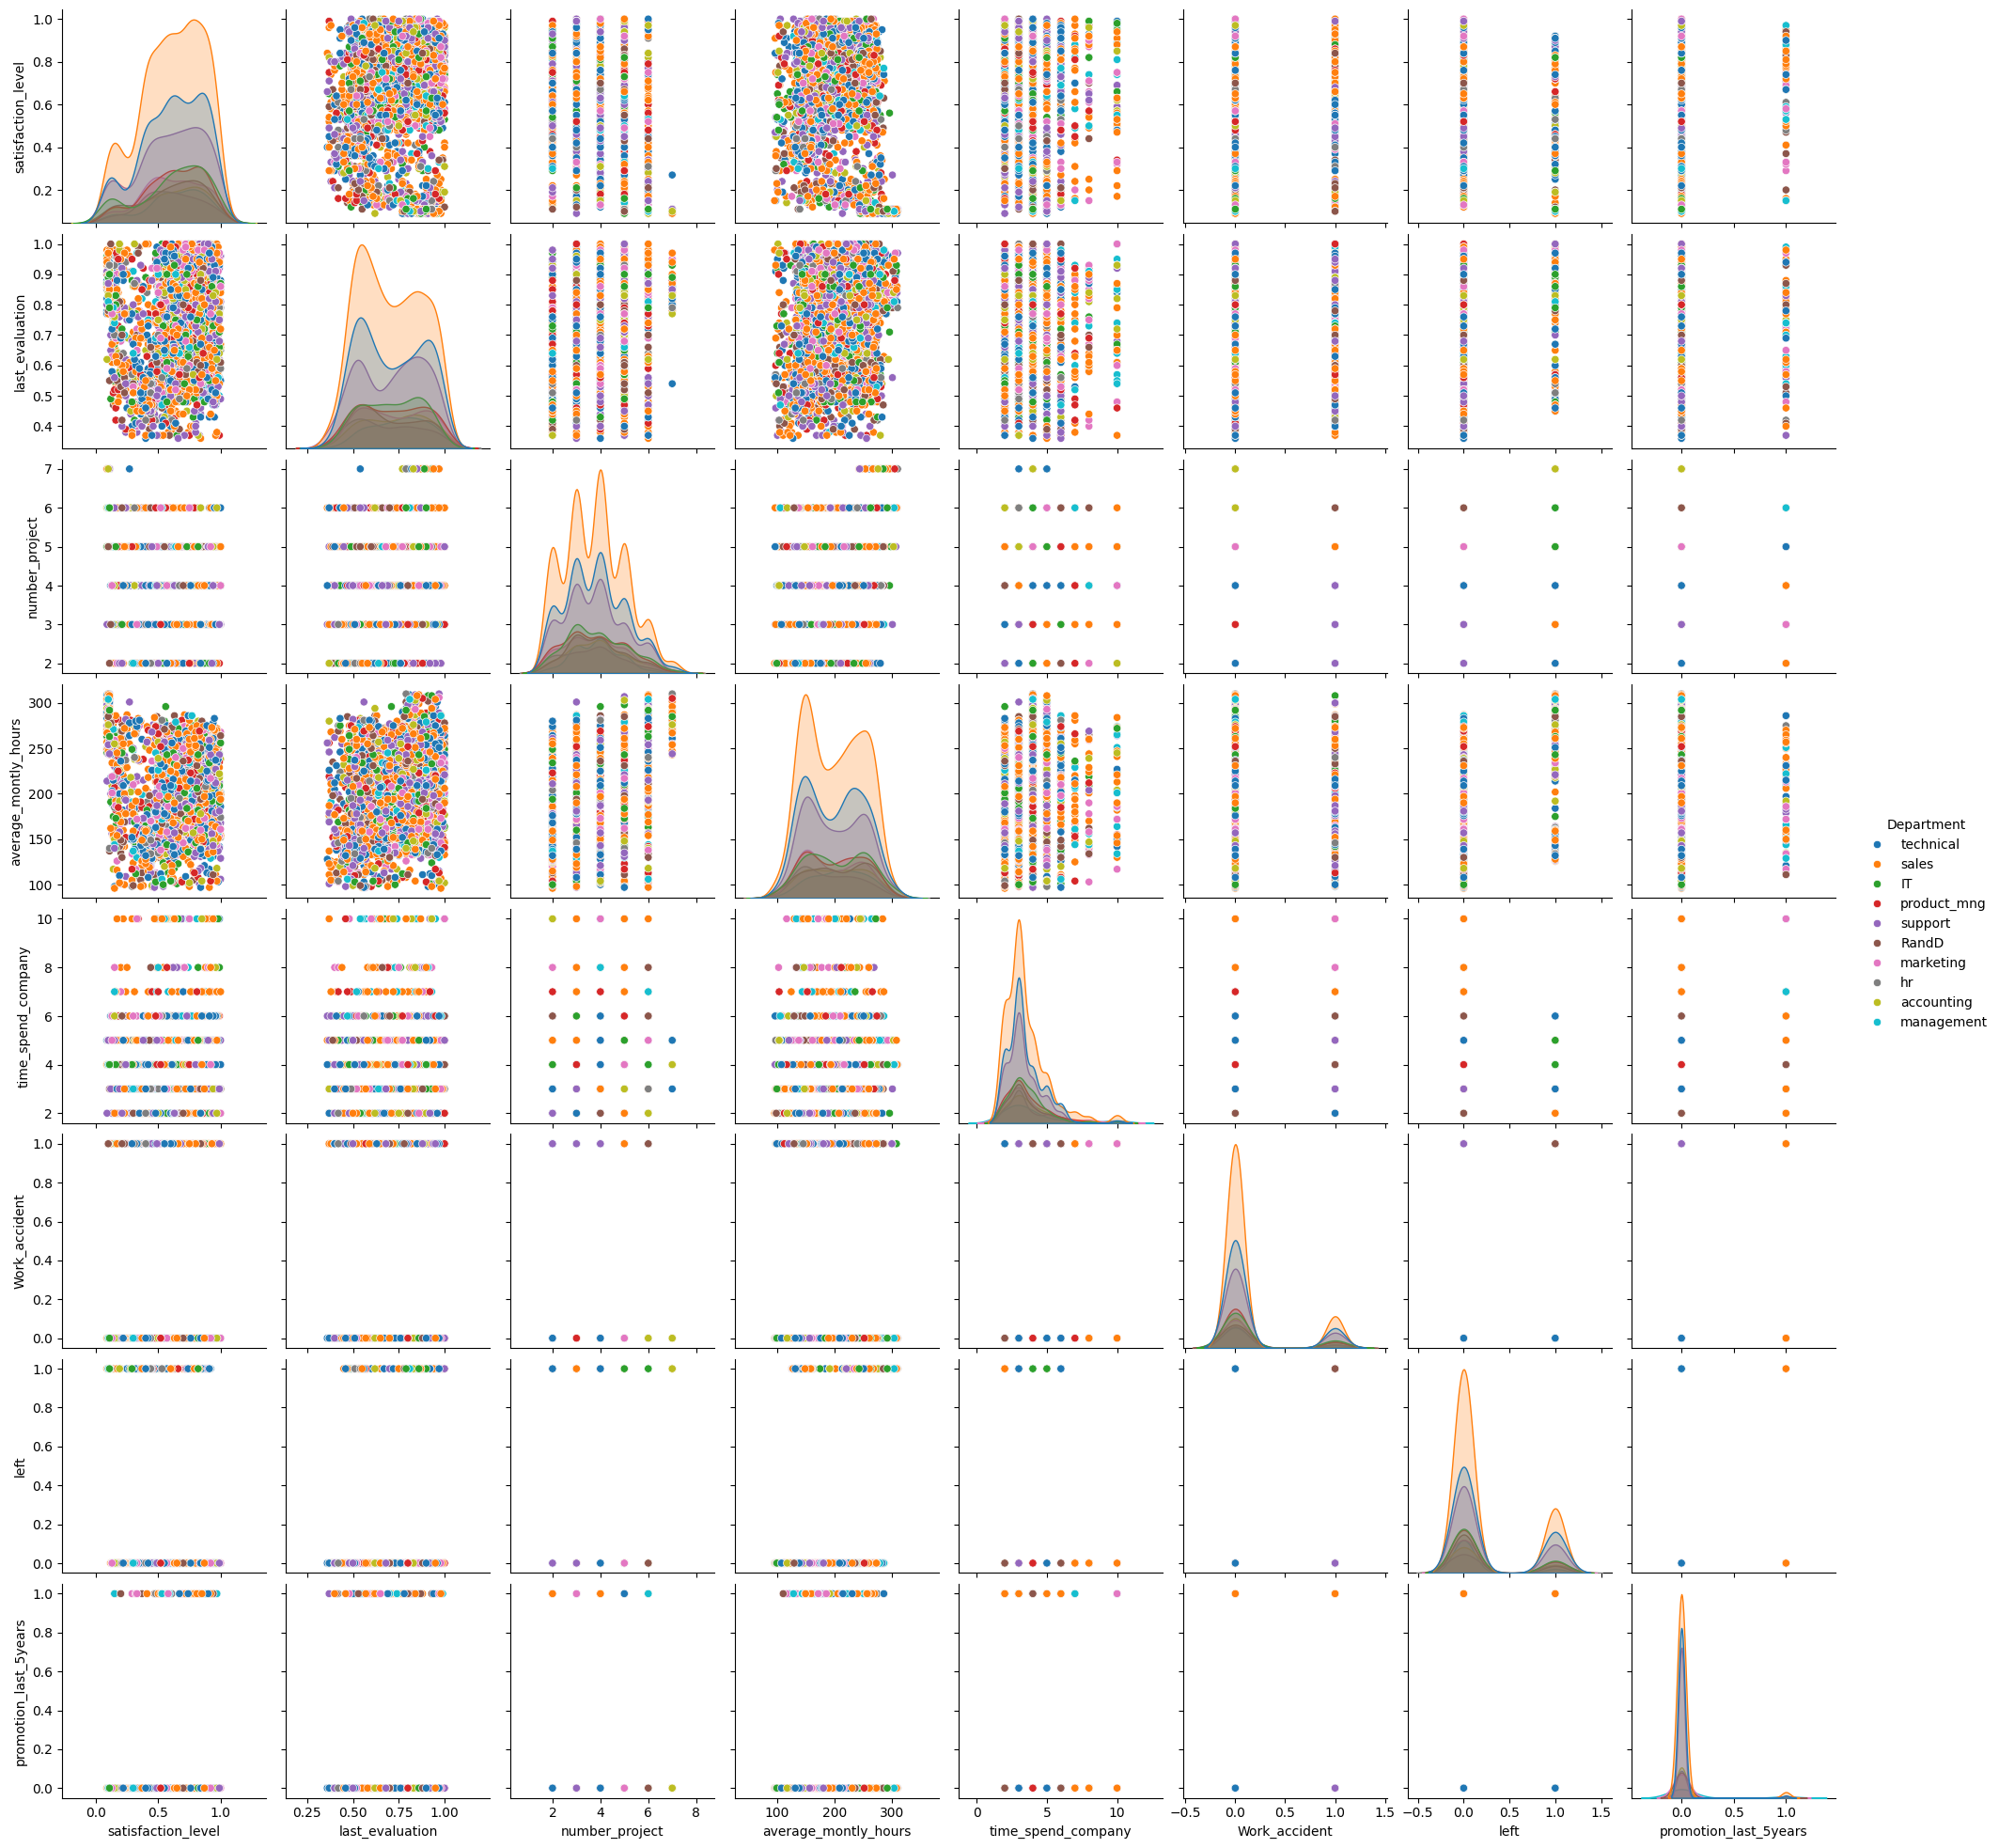

In [7]:
# basic pair plot, hue on department the employees work in
sns.pairplot(df_sample, hue='Department')

<h4><b>seaborn plots - regression plots</b></h4>

In [8]:
# create a new field for an estimated category of evaluation (more useful with regression plots and box plots)
df_sample['last_evaluation_category'] = df_sample.apply(create_last_evaluation_category, axis=1)

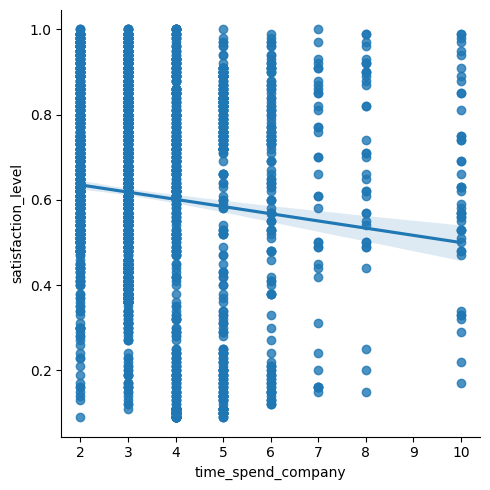

In [9]:
# regression plot, satisfaction vs amount of time spent while traveling to work
sns.lmplot(x='time_spend_company', y='satisfaction_level', data=df_sample)

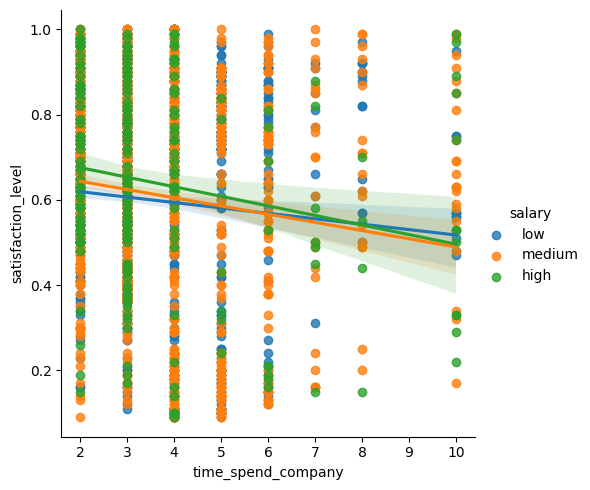

In [10]:
# regression plot, satisfaction vs amount of time spent while traveling to work, hue on salary
sns.lmplot(x='time_spend_company', y='satisfaction_level', data=df_sample, hue="salary")

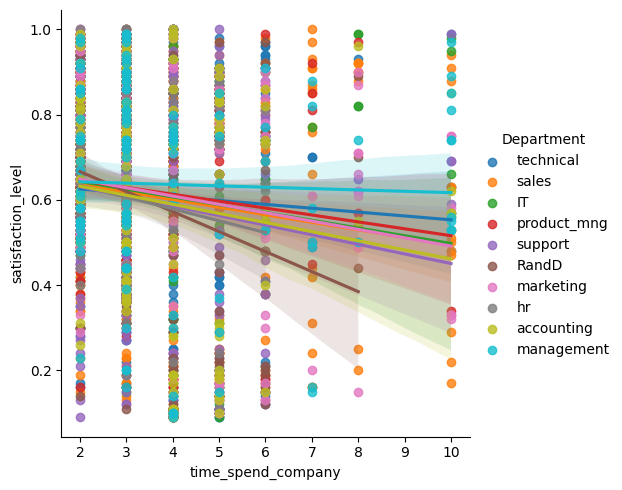

In [11]:
# regression plot, satisfaction vs amount of time spent while traveling to work, hue on department
sns.lmplot(x='time_spend_company', y='satisfaction_level', data=df_sample, hue="Department")

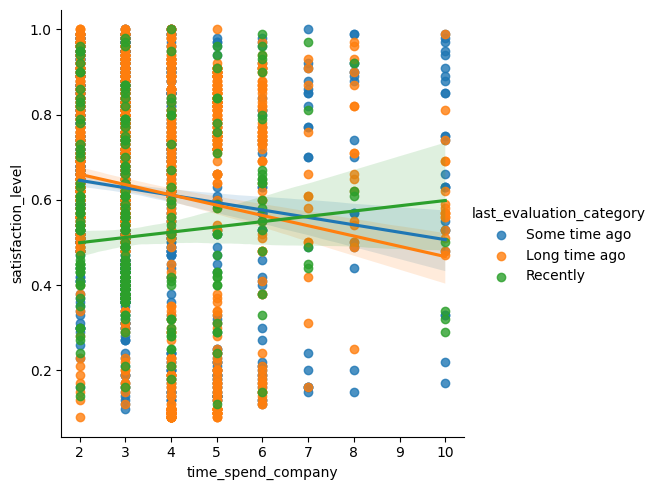

In [12]:
# regression plot, satisfaction vs amount of time spent while traveling to work, hue on last evaluation category
sns.lmplot(x='time_spend_company', y='satisfaction_level', data=df_sample, hue="last_evaluation_category")

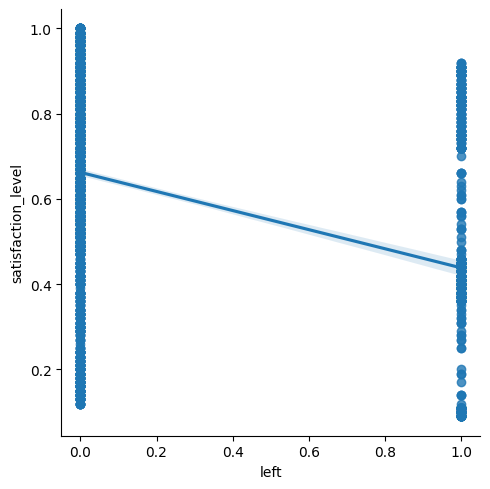

In [13]:
# regression plot, satisfaction vs if employee has left the company
sns.lmplot(x='left', y='satisfaction_level', data=df_sample)

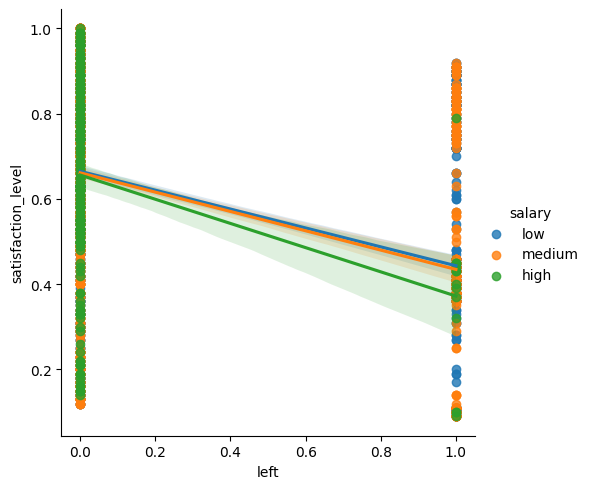

In [14]:
# regression plot, satisfaction vs if employee has left the company, hue on salary
sns.lmplot(x='left', y='satisfaction_level', data=df_sample, hue="salary")

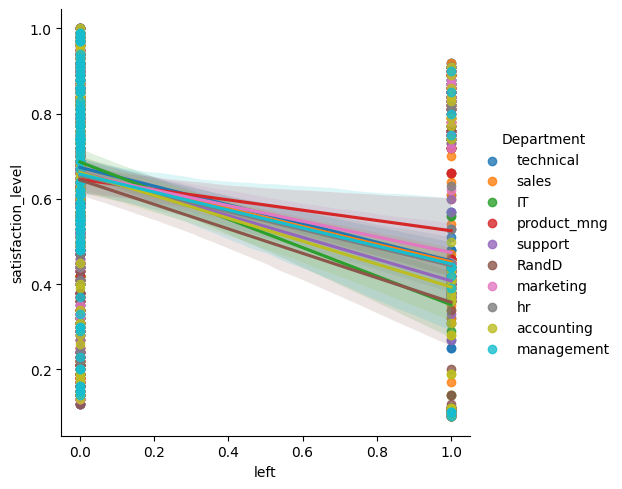

In [15]:
# regression plot, satisfaction vs if employee has left the company, hue on department
sns.lmplot(x='left', y='satisfaction_level', data=df_sample, hue="Department")

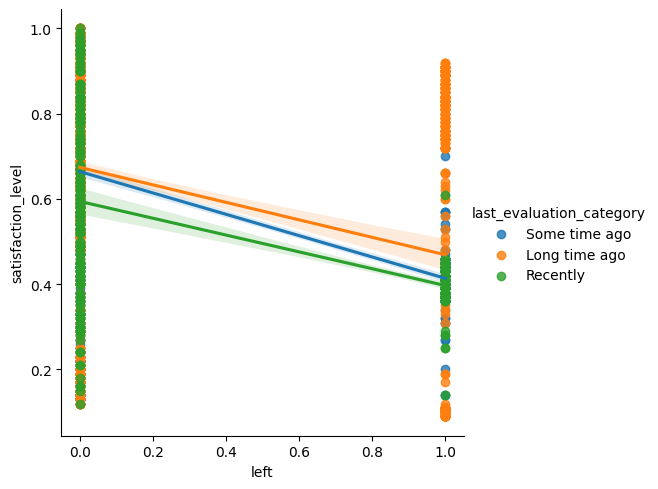

In [16]:
# regression plot, satisfaction vs if employee has left the company, hue on last evaluation category
sns.lmplot(x='left', y='satisfaction_level', data=df_sample, hue="last_evaluation_category")

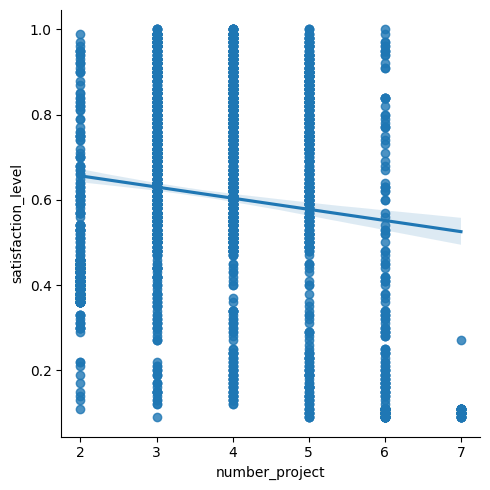

In [17]:
# regression plot, satisfaction vs number of project employee is working on currently
sns.lmplot(x='number_project', y='satisfaction_level', data=df_sample)

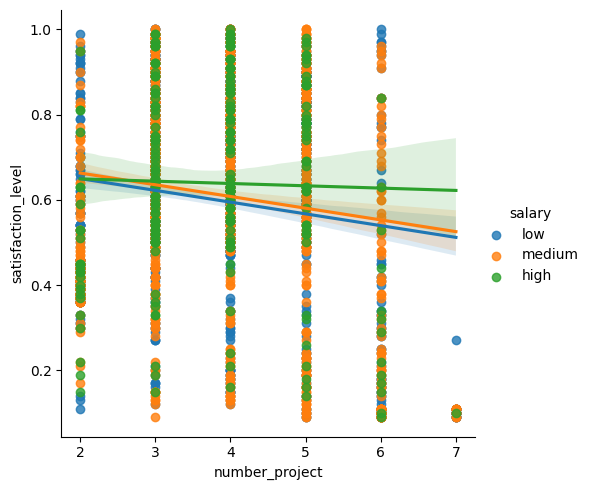

In [18]:
# regression plot, satisfaction vs number of project employee is working on currently, hue on salary
sns.lmplot(x='number_project', y='satisfaction_level', data=df_sample, hue="salary")

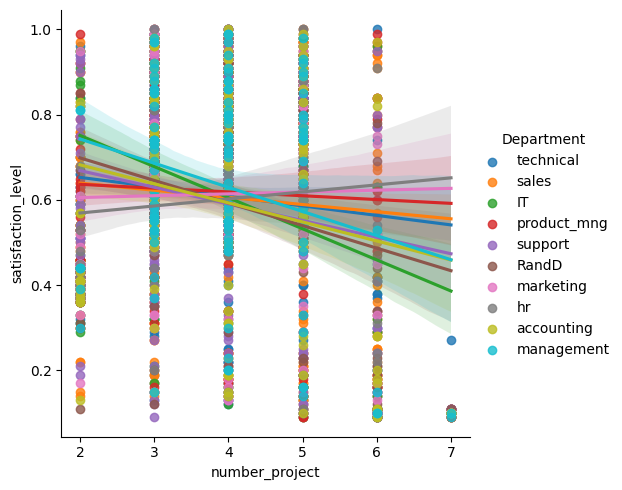

In [19]:
# regression plot, satisfaction vs number of project employee is working on currently, hue on department
sns.lmplot(x='number_project', y='satisfaction_level', data=df_sample, hue="Department")

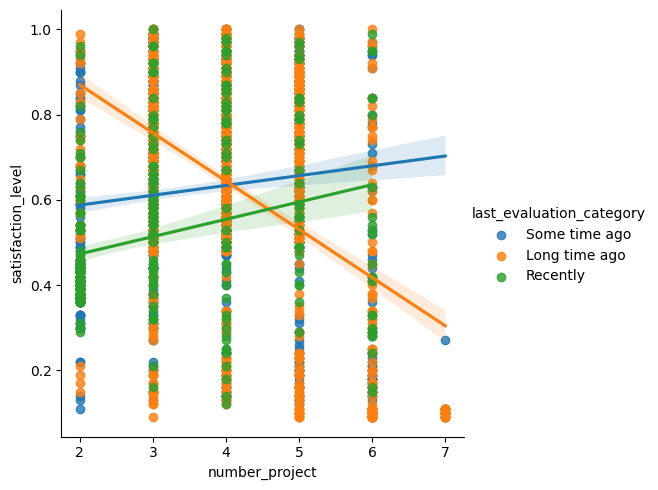

In [20]:
# regression plot, satisfaction vs number of project employee is working on currently, hue on last evaluation category
sns.lmplot(x='number_project', y='satisfaction_level', data=df_sample, hue='last_evaluation_category')

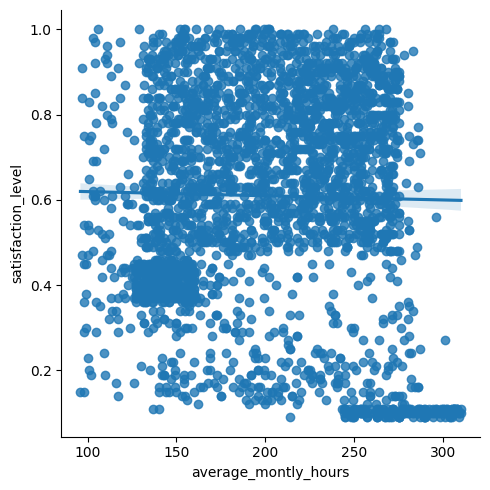

In [21]:
# regression plot, satisfaction vs average monthly hours is working on currently
sns.lmplot(x='average_montly_hours', y='satisfaction_level', data=df_sample)

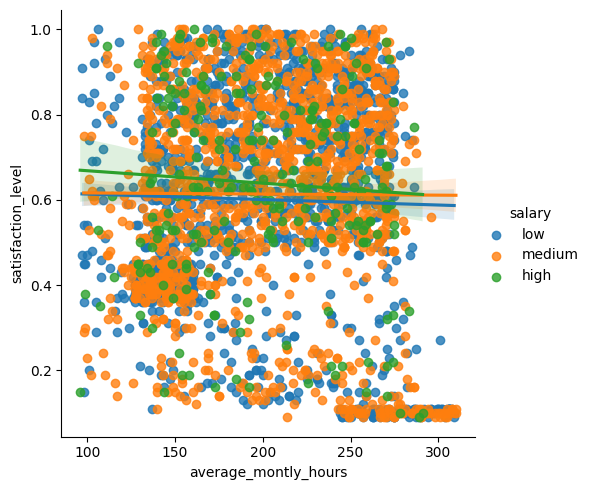

In [22]:
# regression plot, satisfaction vs average monthly hours is working on currently, hue on salary
sns.lmplot(x='average_montly_hours', y='satisfaction_level', data=df_sample, hue='salary')

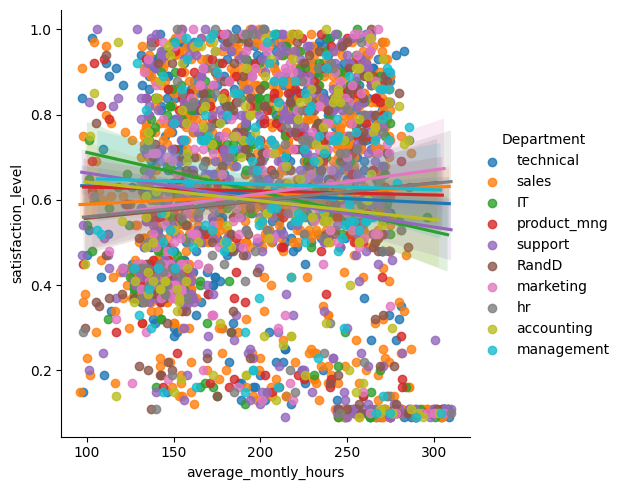

In [23]:
# regression plot, satisfaction vs average monthly hours is working on currently, hue on department
sns.lmplot(x='average_montly_hours', y='satisfaction_level', data=df_sample, hue='Department')

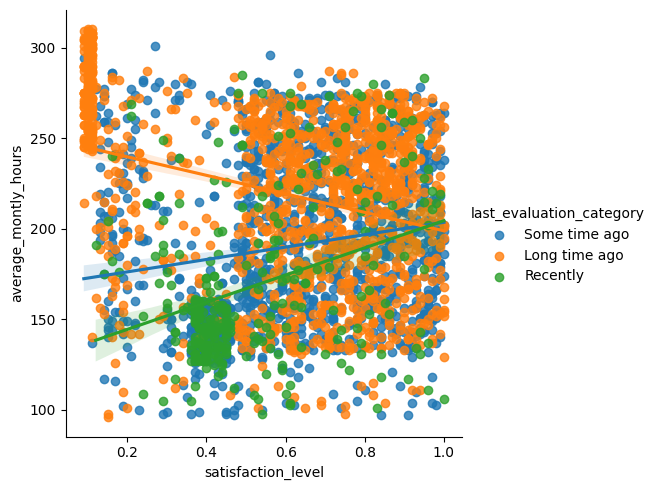

In [24]:
# regression plot, satisfaction vs average monthly hours is working on currently, hue on last evaluation category
sns.lmplot(x='satisfaction_level', y='average_montly_hours', data=df_sample, hue='last_evaluation_category')

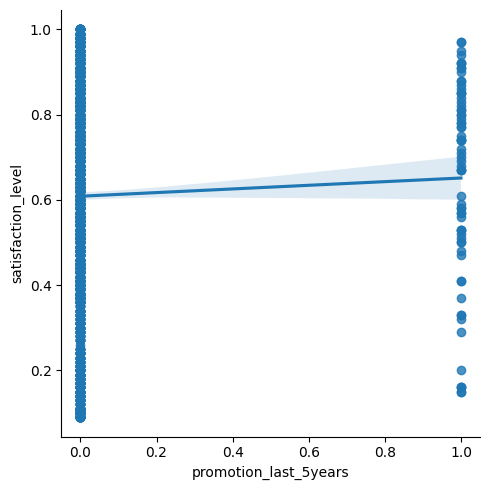

In [25]:
# regression plot, satisfaction vs if promoted in last 5 years
sns.lmplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample)

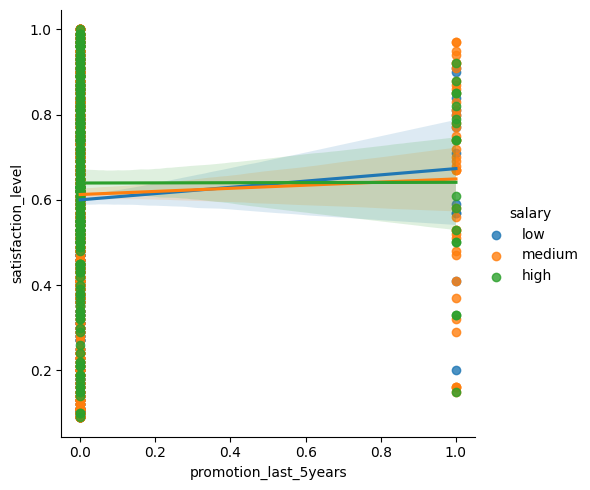

In [26]:
# regression plot, satisfaction vs if promoted in last 5 years, hue on salary
sns.lmplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue="salary")

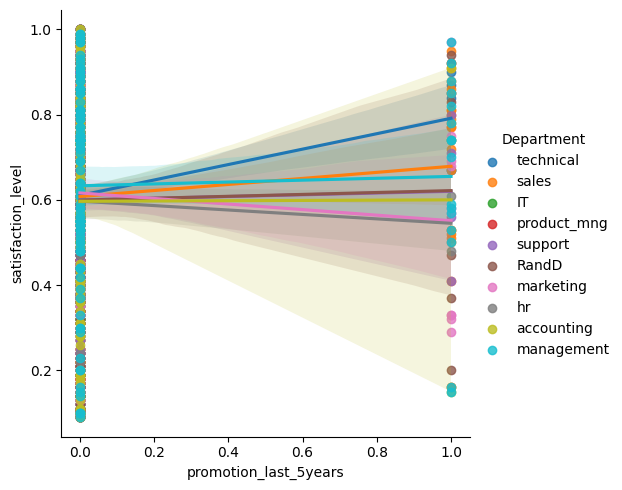

In [27]:
# regression plot, satisfaction vs if promoted in last 5 years, hue on department
sns.lmplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue="Department")

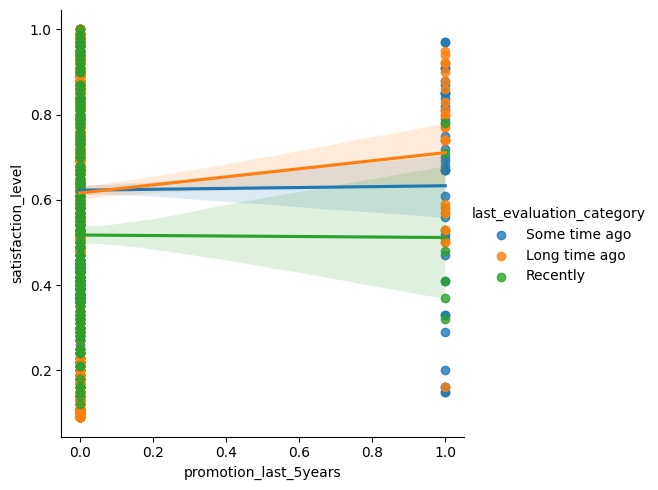

In [28]:
# regression plot, satisfaction vs if promoted in last 5 years, hue on last evaluation category
sns.lmplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue="last_evaluation_category")

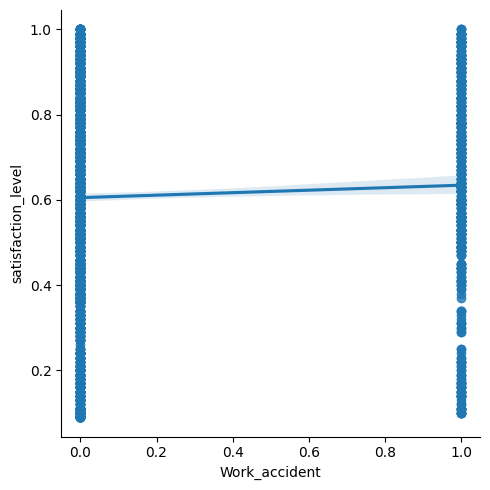

In [29]:
# regression plot, satisfaction vs if had work accident
sns.lmplot(x='Work_accident', y='satisfaction_level', data=df_sample)

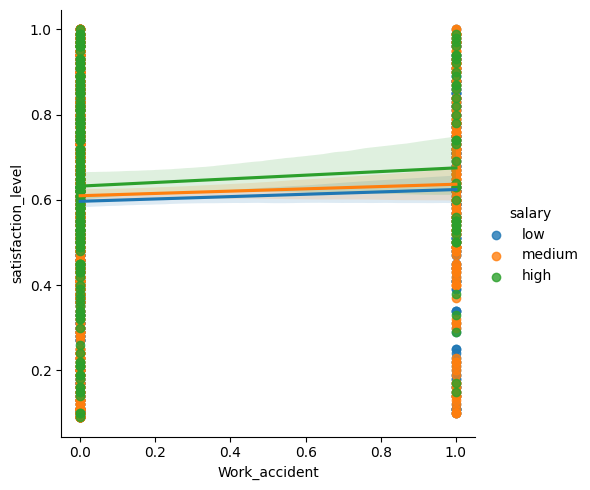

In [30]:
# regression plot, satisfaction vs if had work accident, hue on salary
sns.lmplot(x='Work_accident', y='satisfaction_level', data=df_sample, hue="salary")

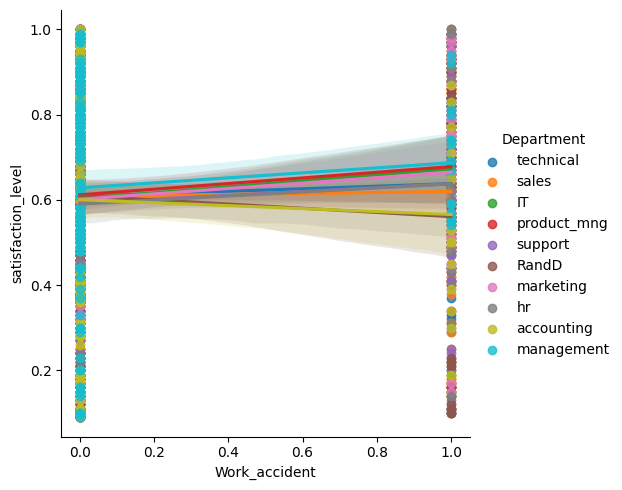

In [31]:
# regression plot, satisfaction vs if had work accident, hue on department
sns.lmplot(x='Work_accident', y='satisfaction_level', data=df_sample, hue="Department")

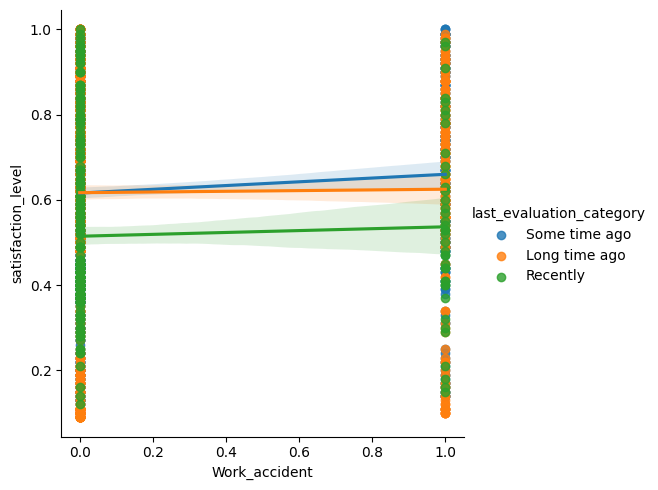

In [32]:
# regression plot, satisfaction vs if had work accident, hue on last evaluation category
sns.lmplot(x='Work_accident', y='satisfaction_level', data=df_sample, hue="last_evaluation_category")

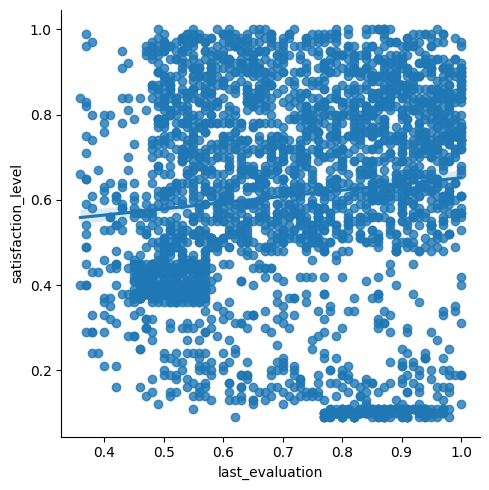

In [33]:
# regression plot, satisfaction vs last evaluation
sns.lmplot(x='last_evaluation', y='satisfaction_level', data=df_sample)

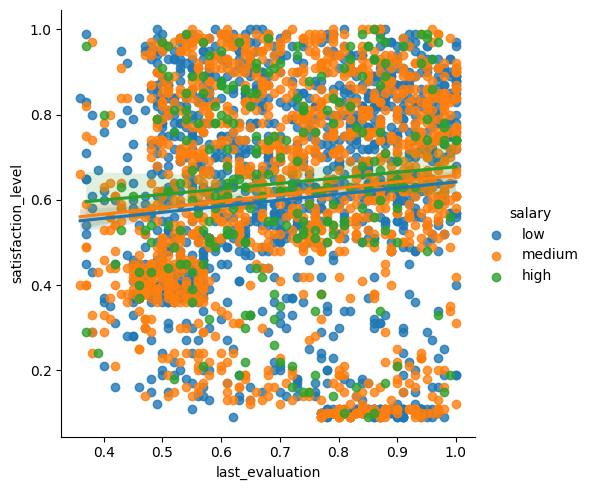

In [34]:
# regression plot, satisfaction vs last evaluation, hue on salary
sns.lmplot(x='last_evaluation', y='satisfaction_level', data=df_sample, hue='salary')

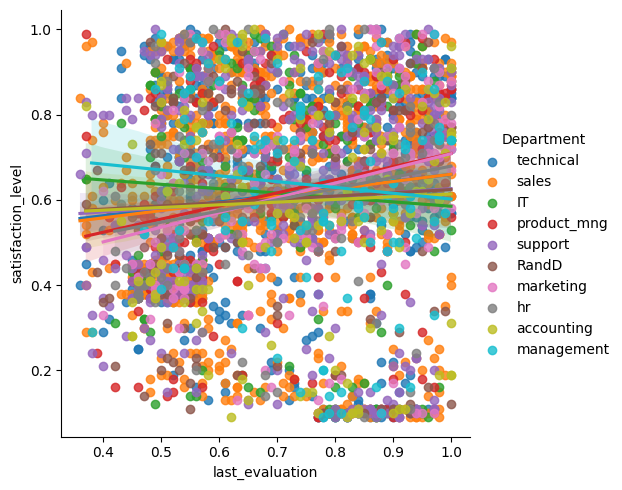

In [35]:
# regression plot, satisfaction vs last evaluation, hue on department
sns.lmplot(x='last_evaluation', y='satisfaction_level', data=df_sample, hue='Department')

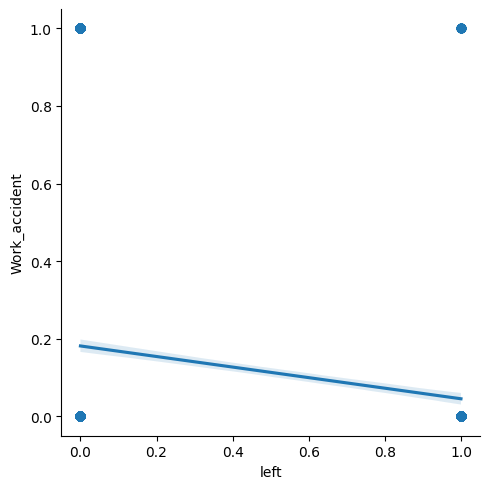

In [36]:
# regression plot, work accident vs if left company
sns.lmplot(x='left', y='Work_accident', data=df_sample)

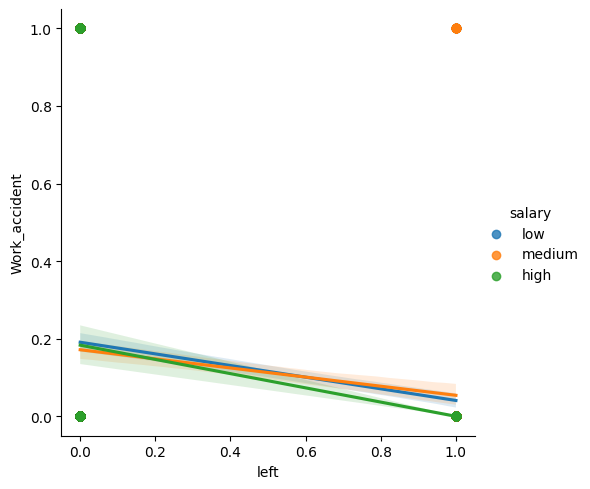

In [37]:
# regression plot, work accident vs if left company, hue on salary
sns.lmplot(x='left', y='Work_accident', data=df_sample, hue='salary')

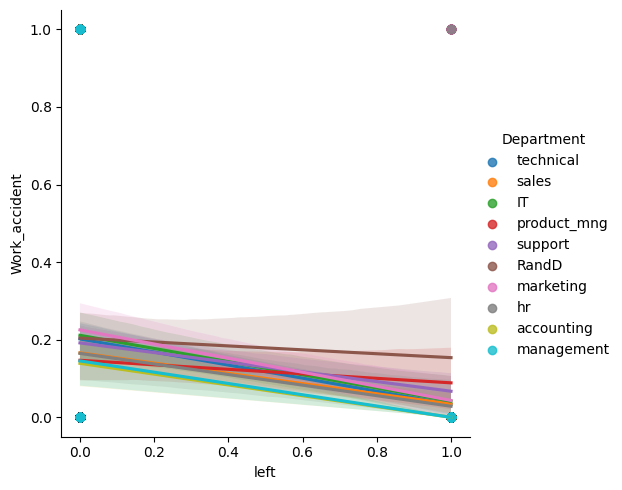

In [38]:
# regression plot, work accident vs if left company, hue on department
sns.lmplot(x='left', y='Work_accident', data=df_sample, hue='Department')

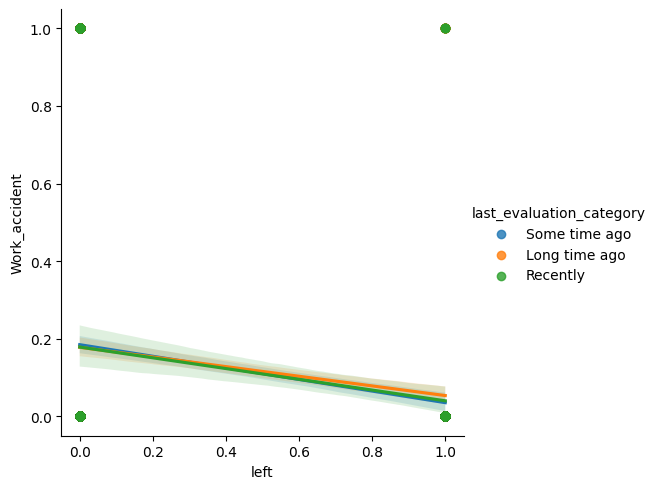

In [39]:
# regression plot, work accident vs if left company, hue on last evaluation category
sns.lmplot(x='left', y='Work_accident', data=df_sample, hue='last_evaluation_category')

<h4><b>seaborn plots - box plots</b></h4>

<Axes: xlabel='promotion_last_5years', ylabel='satisfaction_level'>

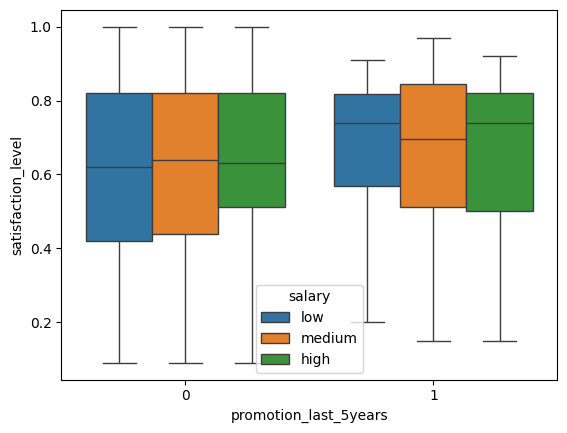

In [40]:
# box plot, promoted vs satisfaction, hue on department
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue='salary')

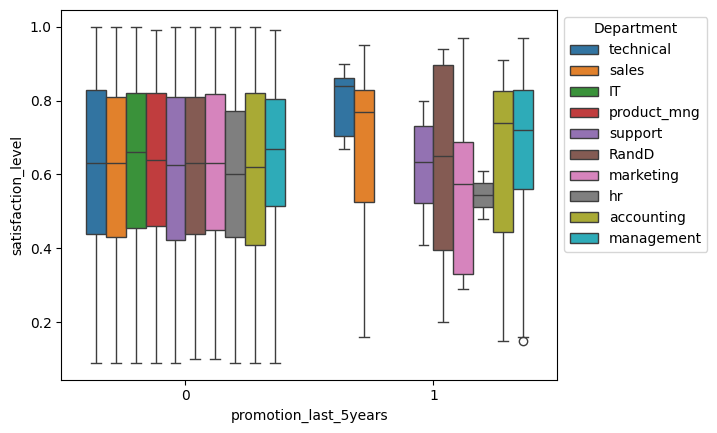

In [41]:
# box plot, promoted vs satisfaction, hue on department, also move the legend outside the chart to improve visibility
ax = sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue='Department')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

<Axes: xlabel='promotion_last_5years', ylabel='satisfaction_level'>

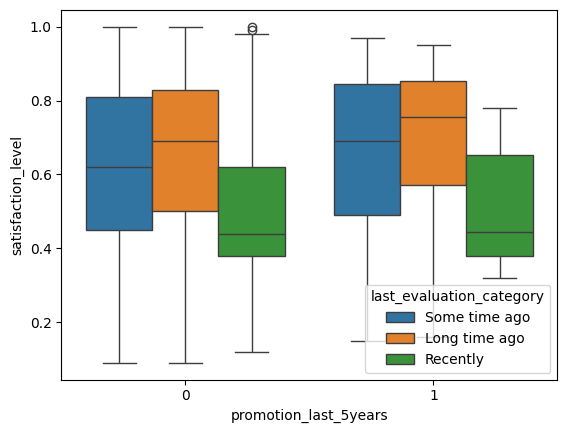

In [42]:
# box plot, promoted vs satisfaction, hue on department
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue='last_evaluation_category')

<Axes: xlabel='promotion_last_5years', ylabel='satisfaction_level'>

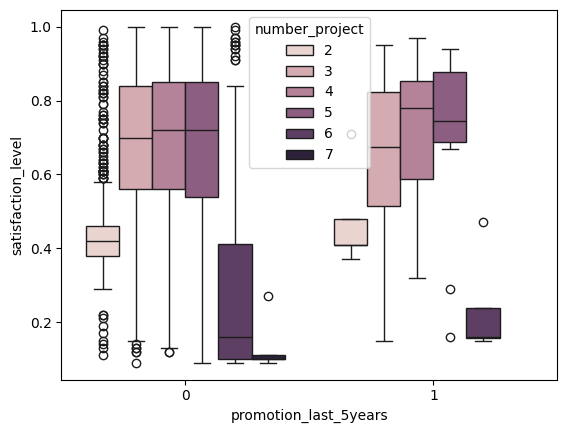

In [43]:
# box plot, promoted vs satisfaction, hue on department
sns.boxplot(x='promotion_last_5years', y='satisfaction_level', data=df_sample, hue='number_project')

In [44]:
# let's see the distribution in average hours
df_sample['average_montly_hours'].value_counts()

average_montly_hours
156    33
145    32
135    32
155    32
149    30
       ..
299     1
96      1
295     1
297     1
303     1
Name: count, Length: 214, dtype: int64

In [45]:
# let's see the distribution time spent while traveling to work
df_sample['time_spend_company'].value_counts()

time_spend_company
3     1278
2      653
4      509
5      302
6      138
10      46
7       37
8       37
Name: count, dtype: int64

In [46]:
# some more grouping with functions to use average montly hours and time spend company with box plot
def create_avg_hour_categories(row):
    hours = row['average_montly_hours']

    if 1 <= hours < 60:
        return 1
    elif 60 <= hours < 105:
        return 2
    elif 105 <= hours:
        return 3

# some more grouping with functions to use average montly hours and time spend company with box plot
def create_avg_travel_time(row):
    time = row['time_spend_company']

    if time <= 3:
        return 1
    elif 3 < time <= 5:
        return 2
    else:
        return 3

# create the new fields with the functions
df_sample['avg_hour_category'] = df_sample.apply(create_avg_hour_categories, axis=1)
df_sample['travel_category'] = df_sample.apply(create_avg_travel_time, axis=1)

<Axes: xlabel='avg_hour_category', ylabel='satisfaction_level'>

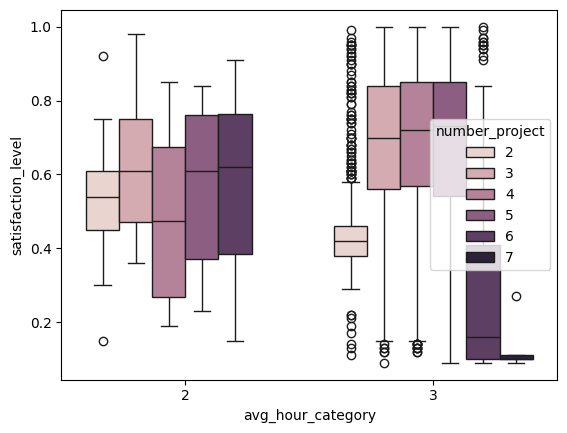

In [47]:
# box plot, promoted vs satisfaction, hue on department
sns.boxplot(x='avg_hour_category', y='satisfaction_level', data=df_sample, hue='number_project')

<Axes: xlabel='travel_category', ylabel='satisfaction_level'>

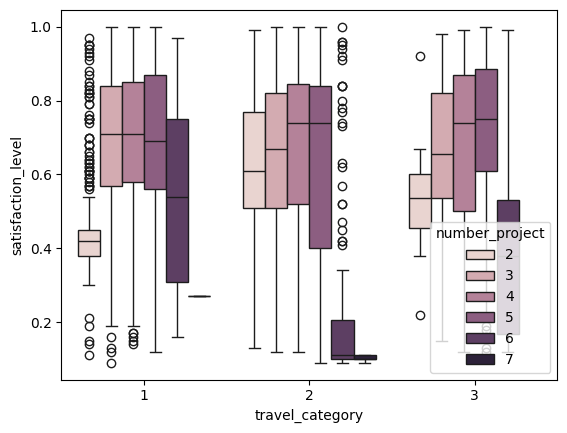

In [48]:
# box plot, promoted vs satisfaction, hue on department
sns.boxplot(x='travel_category', y='satisfaction_level', data=df_sample, hue='number_project')

<h4><b>seaborn plots - heatmaps for correlation matrices</b></h4>

<Axes: >

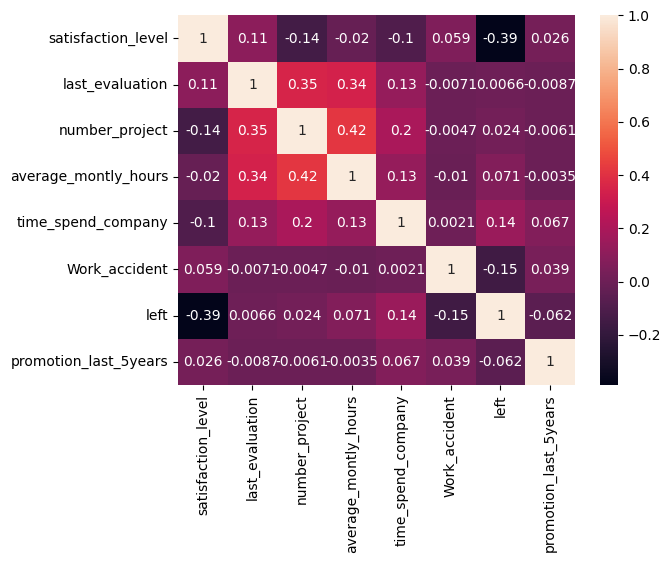

In [49]:
# basic heatmap for correlations
sns.heatmap(correlations, annot=True)